In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('drug_data.csv')
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,arb blocker,0.000000,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,NaN,0.168333,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,NaN,0.067210,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,NaN,0.179545,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,NaN,0.194444,positive


# Basic Data Understanding

In [3]:
data.shape

(161297, 10)

In [4]:
data.isnull().sum()

Unnamed: 0              0
drugName                0
condition             899
review                  0
rating                  0
date                    0
usefulCount             0
drug_class         137837
sentiment               0
sentiment_label         0
dtype: int64

In [5]:
# Most of the drug class is a null value

In [7]:
data['Unnamed: 0'].nunique()

161297

In [8]:
# All the values in Unnamed column are unique. It must be ID column

In [9]:
data.dtypes

Unnamed: 0           int64
drugName            object
condition           object
review              object
rating             float64
date                object
usefulCount          int64
drug_class          object
sentiment          float64
sentiment_label     object
dtype: object

In [10]:
data.describe()

,Unnamed: 0,rating,usefulCount,sentiment
count,161297.000000,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755,0.064847
std,67004.445170,3.272329,36.403742,0.222437
min,2.000000,1.000000,0.000000,-1.000000
25%,58063.000000,5.000000,6.000000,-0.043264
50%,115744.000000,8.000000,16.000000,0.058202
75%,173776.000000,10.000000,36.000000,0.173722
max,232291.000000,10.000000,1291.000000,1.000000


In [11]:
# The value of ratings range from 1 to 10
# There is a lot of variation in usefulCount also
# Min value of sentiment is -1 and max is 1

In [13]:
data['drugName'].nunique()

3436

In [20]:
data['drugName'].value_counts().head(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Citalopram                             995
Medroxyprogesterone                    995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

In [17]:
# These are the drugs having maximum number of records.

In [14]:
# There are a lot of unique drugs

In [54]:
# Lets drop ID
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
data['condition'].nunique()

884

In [21]:
data['condition'].value_counts().head(20)

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

In [22]:
data['drug_class'].value_counts()

antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: drug_class, dtype: int64

In [23]:
data['sentiment_label'].value_counts()

positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

# Sec 1

In [55]:
# 1. The most popular drug
data.groupby(by='drugName',sort=False).mean().sort_values(by=['rating', 'usefulCount','sentiment'], ascending=False).head(50)

,rating,usefulCount,sentiment
drugName,,,
Tapazole,10.0,155.000000,-0.051186
Colace,10.0,146.000000,0.050000
Citrate of Magnesia,10.0,138.500000,0.050000
Vitamin D2,10.0,122.000000,-0.102976
Sotalol Hydrochloride AF,10.0,106.666667,0.170355
Constulose,10.0,103.000000,1.000000
Dantrium,10.0,98.000000,0.118783
Pacerone,10.0,91.000000,0.250000
Norpramin,10.0,89.000000,0.114394


In [46]:
data[data['rating']==10].shape

(50989, 10)

In [58]:
data[data['sentiment']==1].shape

(731, 9)

In [60]:
# More than 50000 drugs have ratings as 10. But we'll simultaneously see the number of usefulCounts and sentiment
# values to make the analysis.

In [59]:
# There are 731 drugs who has sentiment as +1

In [52]:
# 1. The most popular drug
data.groupby(by='drugName',sort=False).mean().sort_values(by=['sentiment', 'rating', 'usefulCount'], ascending=False).head(10)

,Unnamed: 0,rating,usefulCount,sentiment
drugName,,,,
Constulose,93590.0,10.0,103.0,1.0
Cerefolin NAC,22496.0,10.0,25.0,1.0
Gynazole-1,36959.0,10.0,13.0,1.0
Zymine,187575.0,10.0,11.0,1.0
Triprolidine,148323.0,10.0,11.0,1.0
Naftin,223482.0,10.0,11.0,1.0
Hylira,180091.0,10.0,9.0,1.0
Potassium iodide,134005.0,10.0,6.0,1.0
Pima,168012.0,10.0,6.0,1.0


In [56]:
# 1. The most popular drug
data.groupby(by='drugName',sort=False).mean().sort_values(by=['sentiment', 'usefulCount', 'rating'], ascending=False).head(10)

,rating,usefulCount,sentiment
drugName,,,
Constulose,10.0,103.0,1.0
Tylenol Arthritis Pain,9.0,26.0,1.0
Cerefolin NAC,10.0,25.0,1.0
Gynazole-1,10.0,13.0,1.0
Zymine,10.0,11.0,1.0
Triprolidine,10.0,11.0,1.0
Naftin,10.0,11.0,1.0
Hylira,10.0,9.0,1.0
Potassium iodide,10.0,6.0,1.0


In [57]:
# Based on the mean values of Rating, sentiment and usefulCount, we can conclude that Constulose is the most popular drug

In [62]:
# 2. The groups of Drugs used
print(data['drug_class'].nunique())
print(data['drugName'].nunique())

22
3436


In [63]:
# There are 22 unique groups of drugs used and there are 3436 unique drugs in the dataset

In [65]:
# 3. Drug with best review
# Maximum value for rating is 10
data[data['rating']==10].shape

(50989, 9)

In [66]:
# There are 50000+ records with 10 rating.

In [73]:
data[data['rating']==10]['drugName'].nunique()

2698

In [ ]:
# There are 2698 drugs which have perfect 10 rating given by users

In [67]:
# Also, to conclude the best review, we can see the perfect positive sentiments

data[data['sentiment']==1].shape

(731, 9)

In [71]:
# Now, lets look at the name of the drugs having perfect positive sentiment
data[data['sentiment']==1]['drugName'].nunique()

456

In [72]:
# There are 456 drugs which have perfect positive sentiments given by users

In [74]:
# We can not conclude a single drug to be having the best reviews

In [75]:
# In other words, we can also say that most popular drug is the one that has maximum ratings, sentiment with most
# number of useful reviews. So, in a way this is same as Question 1
# Hence, we can say that Constulose is the drug having best reviews

In [76]:
# 4. Number of drugs
# We have 3436 drugs
data['drugName'].nunique()

3436

In [77]:
# 5. Number of drugs per condition
# First, the number of conditions we have is
data['condition'].nunique()

884

In [79]:
unique_condition=data['condition'].unique()

In [81]:
data[data['condition']=='Anxiety']['drugName'].nunique()

78

In [82]:
# From above code, we can say that there are 78 unique drugs for anxiety

In [83]:
# Now, we can construct a for loop to find number of unique drugs for each condition

for i in unique_condition[:10]:
    print(i, ' ', data[data['condition']==i]['drugName'].nunique())

Left Ventricular Dysfunction   8
ADHD   55
Birth Control   172
Opiate Dependence   9
Benign Prostatic Hyperplasia   22
Emergency Contraception   12
Bipolar Disorde   80
Epilepsy   31
Migraine Prevention   50
Depression   105


In [84]:
# To prevent a very long output, we have run the loop for 10 conditions only. 
# Please remove the [:10] from line 1 of the code to execute it for all 884 conditions.

In [89]:
# 6. Number of patients that searched on particular drug
# This is similar to the number of patients who gave ratings or reviews on each drug

# We have to find number of unique reviews of each drug, because one user who searched for the drug
# gave exactly one review to it

unique_drugs=data['drugName'].unique()

# Now, we can construct a for loop

for i in unique_drugs[:10]:
    print(i, ' ', data[data['drugName']==i].shape[0])
    
    
# To prevent a very long output, we have run the loop for 10 drugs only. 
# Please remove the [:10] from line 1 of the code to execute it for all 3436 drugs.

Valsartan   69
Guanfacine   127
Lybrel   10
Ortho Evra   219
Buprenorphine / naloxone   437
Cialis   279
Levonorgestrel   3657
Aripiprazole   500
Keppra   117
Ethinyl estradiol / levonorgestrel   1888


In [171]:
data['drugName'].value_counts().head(10)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Name: drugName, dtype: int64

In [90]:
# 7. How genuine is the review
# We can check how genuine is the review using sentiment analysis and number of useful reviews along with over all
# rating given

In [92]:
# 8. Distribution of sentiments

data['sentiment_label'].value_counts()

positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

In [93]:
# Most of the sentiments are positive

<AxesSubplot:>

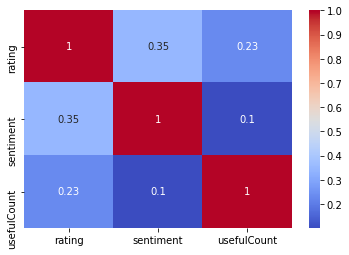

In [97]:
# 9. correlation between rating, review and usefulCounts

data_corr = data[['rating', 'sentiment', 'usefulCount']]

corr=data_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [98]:
# 10. Yes, we can predict rating given review.
# We can pose it as a supervised Machine Learning problem by taking reviews, sentiment and usefulCount as 
# features and rating as target. We have a lot of labelled data available and we can divide the data into
# train, validation and test.

In [99]:
# 11. Distribution of Rating
data['rating'].describe()

count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

In [100]:
# We can observe the min, max, mean, std deviation and quantiles of the rating.

In [159]:
# 12. Amount of reviews made per year and per month
# For this, we'll have to parse the month and year out of the date column

def month(x):
    mon=x.split(' ')[0]
    return mon

def year(x):
    year=x.split(' ')[-1]
    return year  

data['month']=data['date'].apply(month)
data['year']=data['date'].apply(year)

In [160]:
data.head()

,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label,month,year
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,arb blocker,0.000000,neutral,May,2012
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,NaN,0.168333,positive,April,2010
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,NaN,0.067210,positive,December,2009
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,NaN,0.179545,positive,November,2015
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,NaN,0.194444,positive,November,2016


In [161]:
# Now, we'll see the number of reviews per month and per year

In [164]:
data['month'].value_counts()

August       14554
October      14038
March        13956
November     13875
July         13852
April        13736
January      13657
September    13475
May          13345
June         12749
February     12041
December     12019
Name: month, dtype: int64

<AxesSubplot:>

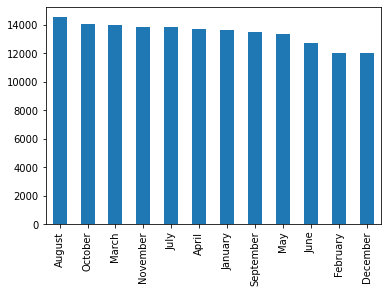

In [167]:
data['month'].value_counts().plot.bar()

In [165]:
data['year'].value_counts()

2016    34842
2017    28087
2015    27164
2013    12278
2014    12051
2011    11682
2009    11636
2012    10007
2010     8413
2008     5137
Name: year, dtype: int64

<AxesSubplot:>

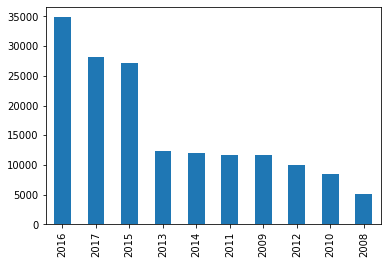

In [168]:
data['year'].value_counts().plot.bar()

In [125]:
# 13. Condition with most reviews

num_reviews=data.groupby(by='condition',sort=False).count()

In [127]:
num_reviews.head()

,drugName,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
condition,,,,,,,,
Left Ventricular Dysfunction,19,19,19,19,19,13,19,19
ADHD,3383,3383,3383,3383,3383,27,3383,3383
Birth Control,28788,28788,28788,28788,28788,0,28788,28788
Opiate Dependence,1079,1079,1079,1079,1079,0,1079,1079
Benign Prostatic Hyperplasia,561,561,561,561,561,108,561,561


In [133]:
num_reviews.max()

drugName           28788
review             28788
rating             28788
date               28788
usefulCount        28788
drug_class          1935
sentiment          28788
sentiment_label    28788
dtype: int64

In [132]:
num_reviews[num_reviews['drugName']==28788].index

Index(['Birth Control'], dtype='object', name='condition')

In [135]:
# We can verify it
data[data['condition']=='Birth Control'].shape[0]

28788

In [136]:
# So, max number of reviews are corresponding to the condition Birth Control

In [163]:
# Second method

data['condition'].value_counts().head(1).index

Index(['Birth Control'], dtype='object')

# Section 2

In [172]:
# 1. Similar to Q4 sec 1

In [173]:
# 2. Similar to Q1 sec 1

In [174]:
# 3. Similar to Q2 sec 1

In [175]:
# 4. Similar to Q3 sec 1

In [176]:
# 5. Similar to Q5 sec 1

In [177]:
# 6. Similar to Q6 sec 1